Dataset Overview:

Source: Dataset is taken from Kaggle

Duration: The dataset records cyber attacks from January 1, 2020, to October 11, 2023.

Shape: The records cover 40,000 data entries and include 25 different columns.

Columns:

Timestamp: The time at which the network activity occurred.

Source IP Address: The IP address of the sender or initiator of the network traffic.

Destination IP Address: The IP address of the receiver or target of the network traffic.

Source Port: The port number used by the source IP address.

Destination Port: The port number used by the destination IP address.

Protocol: The communication protocol used (e.g., TCP, UDP, ICMP).

Packet Length: The size of the packet in bytes.

Packet Type: Type of packet (e.g., data packet, control packet).

Traffic Type: The type of traffic (e.g., web traffic, email traffic).

Payload Data: The actual data transmitted in the packet.

Malware Indicators: Indicators of potentially malicious activity or presence of malware.

Anomaly Scores: Scores indicating deviations from expected behavior, used for anomaly detection.

Alerts/Warnings: Notifications or warnings generated by security systems or monitoring tools.

Attack Type: Type of attack detected or suspected (e.g., DDoS, SQL injection).

Attack Signature: Specific patterns or signatures associated with known attacks.

Action Taken: Actions performed in response to detected threats or anomalies.

Severity Level: The level of severity associated with an alert or event (e.g., low, medium, high).

User Information: Information about the user involved in the network activity.

Device Information: Information about the device involved in the network activity (e.g., device type, operating system).

Network Segment: The segment or subnet of the network where the activity occurred.

Geo-location Data: Geographical location information associated with IP addresses.

Proxy Information: Information about proxy servers involved in the network communication.

Firewall Logs: Logs generated by firewall devices indicating allowed or blocked traffic.

IDS/IPS Alerts: Alerts generated by Intrusion Detection Systems (IDS) or Intrusion Prevention Systems (IPS) indicating suspicious or malicious activity.

Log Source: The source or origin of the log entry (e.g., name of the logging system or device).logging system or device).


In [43]:
# Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import plotly.express as px

In [7]:
# load the data
df = pd.read_csv("cybersecurity_attacks.csv")

In [8]:
df.head().T

,0,1,2,3,4
Timestamp,5/30/2023 6:33,8/26/2020 7:08,11/13/2022 8:23,7/2/2023 10:38,7/16/2023 13:11
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
# Check if there is a null val
df.isna().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

Now let's handle the missing value

In [18]:
#Check for NaN values in 'Alerts/Warnings' column and replace it with 'No Alert Triggered'
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'No Alert Triggered' if pd.isna(x) else x)

In [19]:
#Check for NaN values in 'Malware Indicators' column and replace it with 'No Detection'
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [20]:
#Check for NaN values in 'Proxy Information' column and replace it with 'No proxy'
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [21]:
#Check for NaN values in 'Firewall Logs' column and replace it with 'No Data'
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [22]:
#Check for NaN values in 'IDS/IPS Alerts' column and replace it with 'No Data'
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'No Data' if pd.isna(x) else x)

In [23]:
df.isna().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [10]:
# used the value count function for understanding the distribution of devices used to access the system.
df['Device Information'].value_counts()

Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)                                                                                       35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)                                                                                           34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)                                                                                           33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)                                                                                       31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)                                                                                       31
                                                                                                                                                      ..
Mozilla/5.0 (Macintosh; PPC Mac OS X 10_9_2; rv:1.9.2.20) Gecko

The user agent (UA) string is a piece of text information included in every HTTP request sent by a web browser or other web client (like a mobile app or a program that downloads content). It tells the server information about the software that is making the request.

In [11]:
# Extract 'Device' and store it in 'Browser' column
df['Browser'] = df['Device Information'].str.split('/').str[0]

In [12]:
# Identify all the different device types found (from 'Browser' column)
df['Browser'].unique()

array(['Mozilla', 'Opera'], dtype=object)

The re library in Python provides tools for working with regular expressions. Regular expressions are a concise way to define patterns of characters that you want to find or manipulate within text strings.

In [13]:
import re
# List of regular expressions to identify common operating systems and devices
patterns = [
    r'Windows',
    r'Linux',
    r'Android',
    r'iPad',
    r'iPod',
    r'iPhone',
    r'Macintosh',
]

def extract_device_or_os(user_agent):
    for pattern in patterns:
        match = re.search(pattern, user_agent, re.I)  # re.I makes the search case-insensitive
        if match:
            return match.group()
    return 'Unknown'  

In [14]:
# Extract device or OS
df['Device/OS'] = df['Device Information'].apply(extract_device_or_os)

In [15]:
df = df.drop('Device Information', axis = 1)

In [18]:
df['Browser'].value_counts()

Browser
Mozilla    31951
Opera       8049
Name: count, dtype: int64

In [16]:
# Group by 'Device/OS' and count the number of attacks
device_counts = df['Device/OS'].value_counts()

# Convert the result to a DataFrame for better readability
device_counts_df = pd.DataFrame(device_counts).reset_index()
device_counts_df.columns = ['Device/OS', 'Count of Attacks']

# Display the top 10 devices/OS by number of attacks
top_devices = device_counts_df.head(10)
print(top_devices)

   Device/OS  Count of Attacks
0    Windows             17953
1      Linux              8840
2  Macintosh              5813
3       iPod              2656
4    Android              1620
5     iPhone              1567
6       iPad              1551


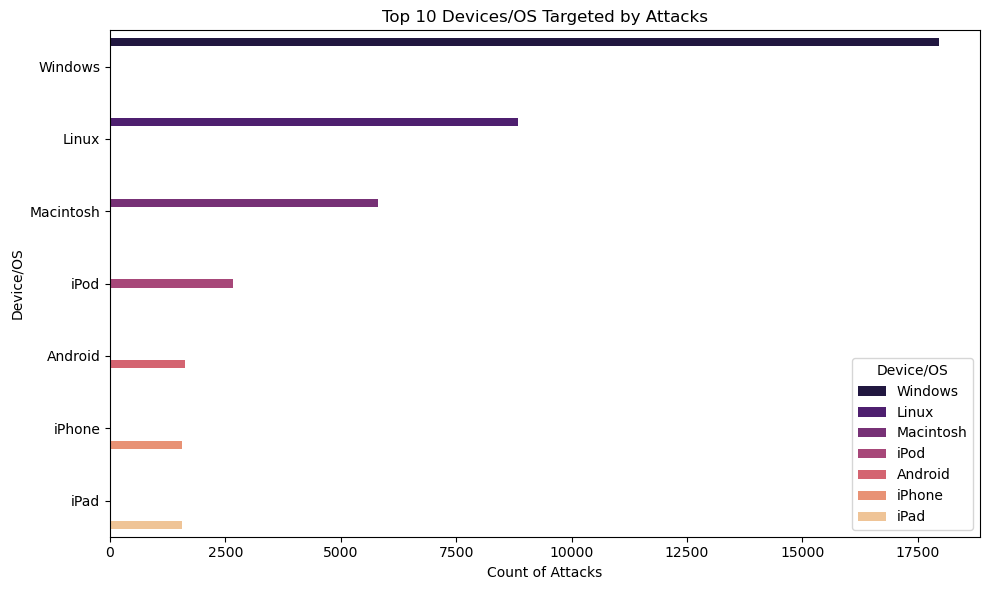

In [44]:
# Plotting the top devices/OS 
plt.figure(figsize=(10, 6))
sns.barplot(x='Count of Attacks', y='Device/OS', hue='Device/OS', data=top_devices, palette='magma')
plt.xlabel('Count of Attacks')
plt.ylabel('Device/OS')
plt.title('Top 10 Devices/OS Targeted by Attacks')
plt.tight_layout()
plt.show()

In [40]:
fig = px.bar(top_devices, x='Count of Attacks', y='Device/OS', color='Device/OS', title='Top 10 Devices/OS Targeted by Attacks', orientation='h')
fig.show()

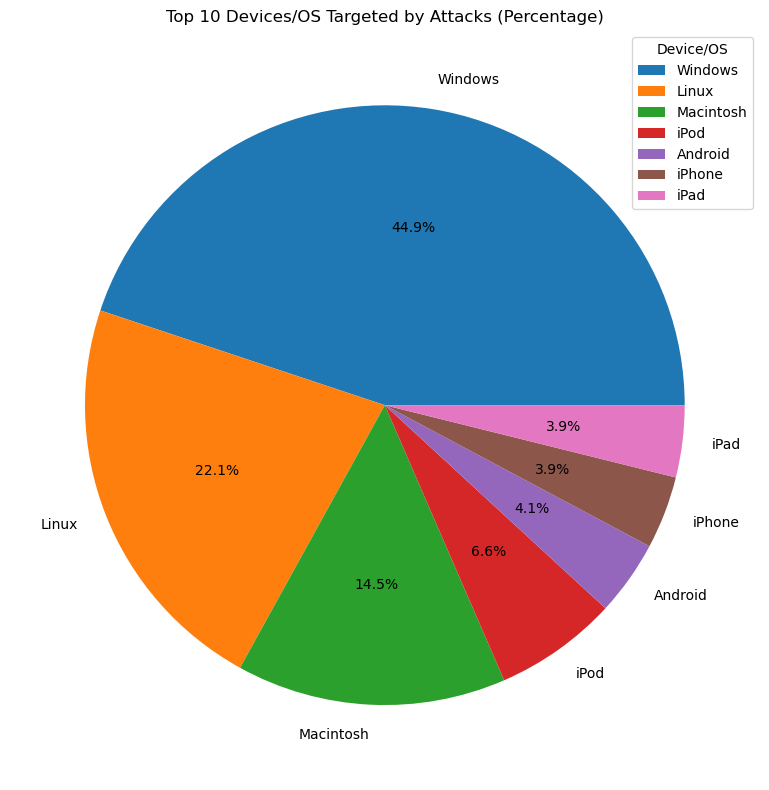

In [38]:
import matplotlib.pyplot as plt

# Assuming 'top_devices' is a DataFrame with columns 'Device/OS' and 'Count of Attacks'

plt.figure(figsize=(8, 8))  # Adjust figure size for pie chart

# Sort data by attack count (descending) for better pie chart presentation
top_devices_sorted = top_devices.sort_values(by='Count of Attacks', ascending=False)

# Create the pie chart
plt.pie(top_devices_sorted['Count of Attacks'], labels=top_devices_sorted['Device/OS'], autopct="%1.1f%%")  # Display percentages with one decimal place
plt.title('Top 10 Devices/OS Targeted by Attacks (Percentage)')

# Add a legend
plt.legend(title='Device/OS')

plt.tight_layout()
plt.show()

In [37]:
import plotly.express as px

# Assuming you have a column 'count' in your DataFrame representing the count of each device/OS
plt = px.pie(device_counts_df, names='Device/OS', values='Count of Attacks', title='Platform Distribution',
             color_discrete_sequence=px.colors.qualitative.Pastel1
             )
plt.show()

In [ ]:
import plotly.express as px
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


# Group by city and count incidents
city_incidents = df['Geo-location Data'].value_counts().reset_index()
city_incidents.columns = ['City', 'Incidents']

# Initialize geolocator
geolocator = Nominatim(user_agent="geo_locator")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Geocode cities
city_incidents['Location'] = city_incidents['City'].apply(geocode)
city_incidents['Latitude'] = city_incidents['Location'].apply(lambda loc: loc.latitude if loc else None)
city_incidents['Longitude'] = city_incidents['Location'].apply(lambda loc: loc.longitude if loc else None)

# Drop cities where coordinates could not be found
city_incidents = city_incidents.dropna(subset=['Latitude', 'Longitude'])

# Create the interactive map
fig = px.scatter_geo(
    city_incidents,
    lat='Latitude',
    lon='Longitude',
    text='City',
    size='Incidents',
    size_max=15,
    title='Total Incidents in Each City',
    hover_name='City',
    hover_data={'Incidents': True, 'Latitude': False, 'Longitude': False},
    projection="natural earth"
)

# Show the interactive map
fig.show()